In [ ]:
import pandas as pd

# first we load the dataset, we are gonna use the California one as it was already available
data = pd.read_csv('california_housing.csv')

# display the first few rows of the dataset
print("Head:")
print(data.head())

# then we show basic information about the dataset like the number of rows and columns, data types, and non-null counts
print("\nInfo:")
print(data.info())

# we add the describe properties to get the min, max, mean, and other statistics for each column
print("\nDescribe:")
print(data.describe())

Head:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entrie

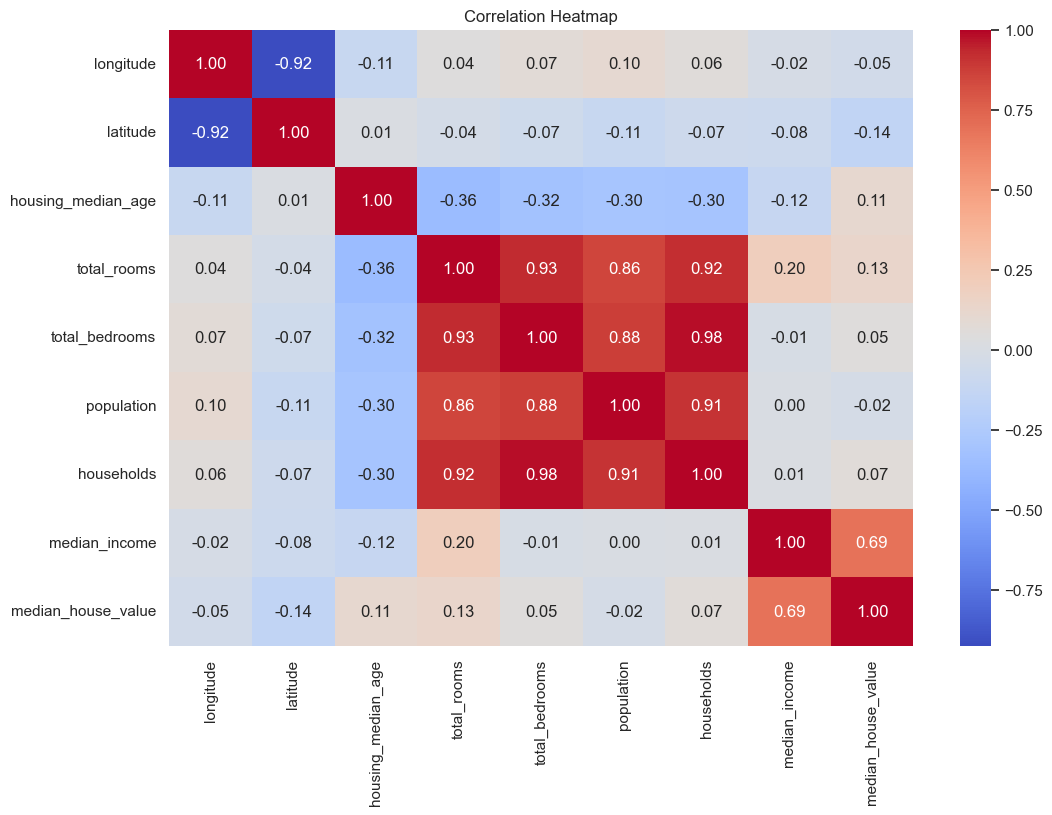

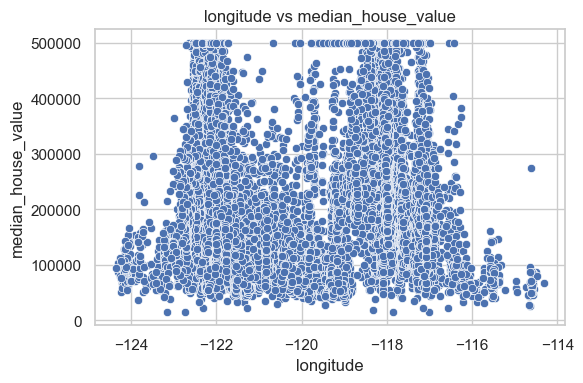

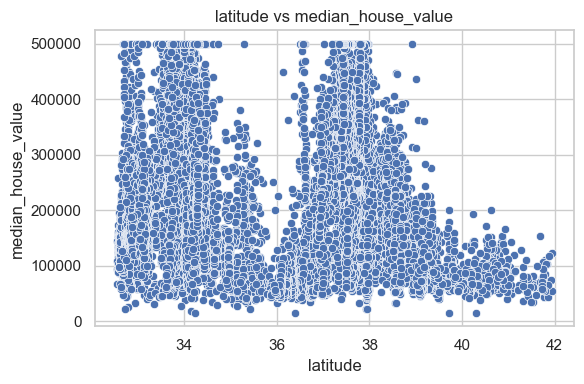

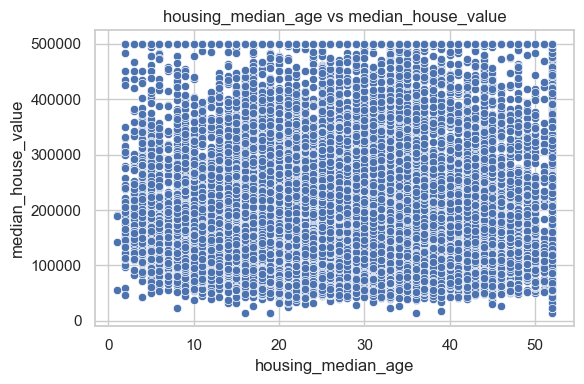

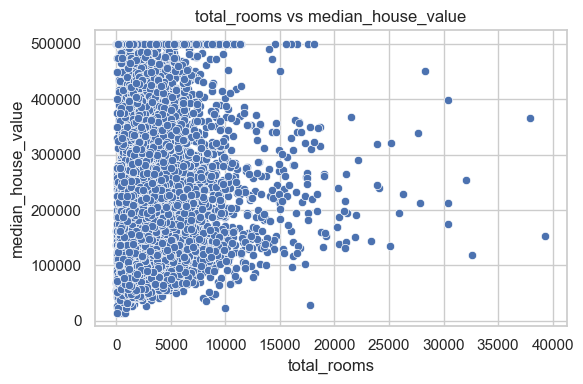

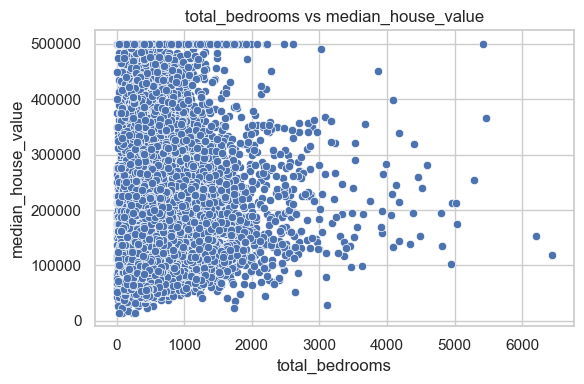

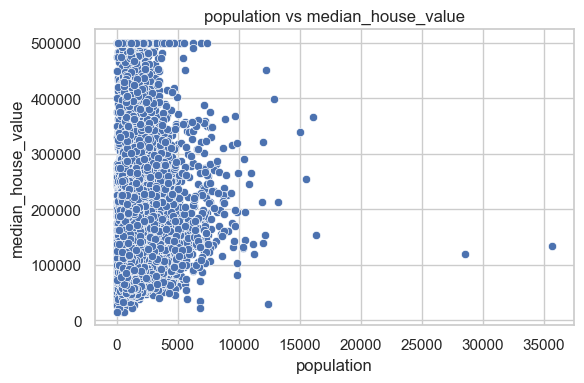

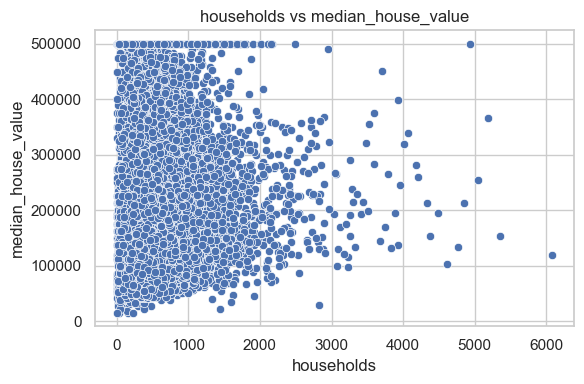

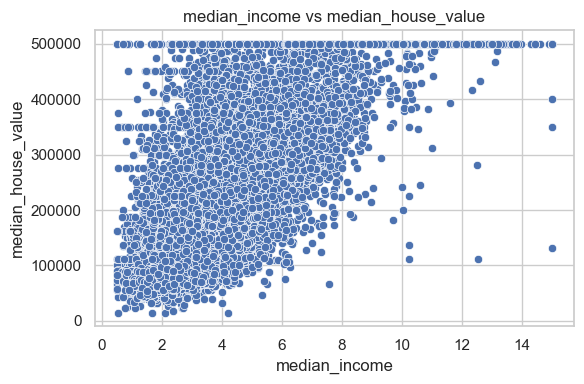

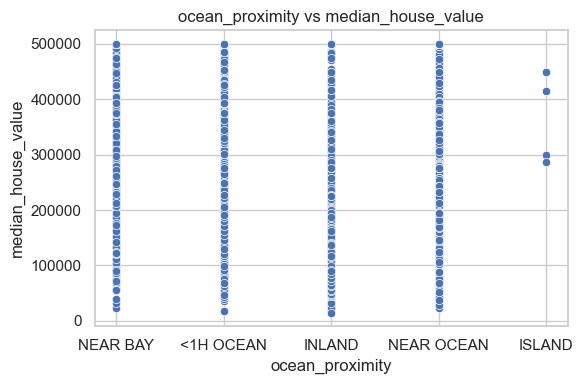

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# we choose the plot style
sns.set(style="whitegrid")

# to avoid discrepancies, only select numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# initial correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# and the scatter plots for each feature vs the target
target = 'median_house_value'
features = data.columns.drop(target)

# comparition of feature vs target
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# target
target = 'median_house_value'

# to drop non-numeric 'ocean_proximity' column
data_numeric = data.drop(columns=['ocean_proximity'])

# Drop rows with any NaN values
data_numeric = data_numeric.dropna()

# separate features and target
X = data_numeric.drop(columns=[target])
y = data_numeric[target]

# In here we split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# to train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Output model parameters
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate model
print("\nPerformance Metrics:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Model Coefficients: [-4.25467060e+04 -4.23360430e+04  1.15509711e+03 -8.44041848e+00
  1.15830375e+02 -3.67587673e+01  4.16404344e+01  4.02932784e+04]
Intercept: -3569674.526696154

Performance Metrics:
R² Score: 0.6400865688993729
MAE: 51372.67217050071
MSE: 4921881237.628157
RMSE: 70156.12045736393


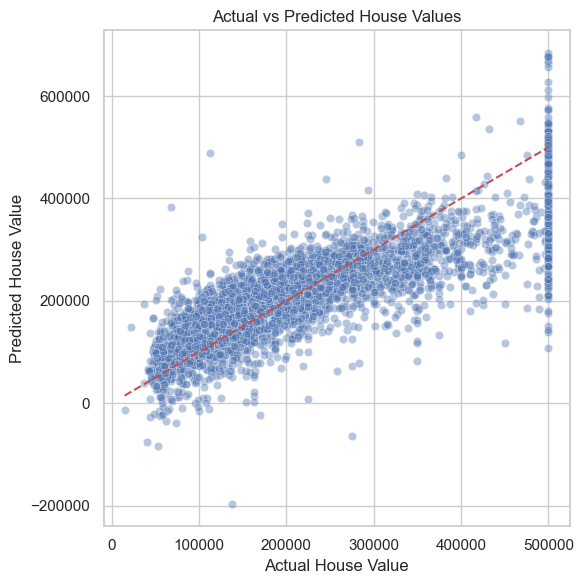

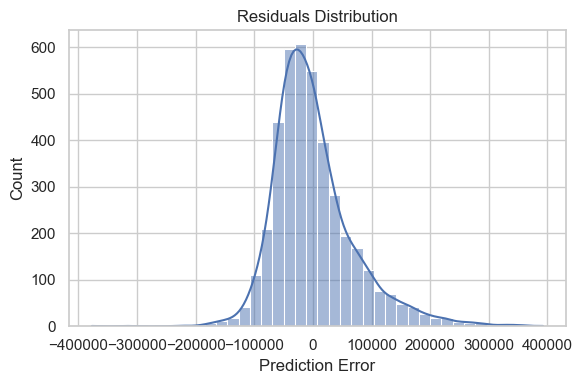

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # reference line
plt.tight_layout()
plt.show()

# residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

# correlation matrix for feature selection
correlation_matrix = data_numeric.corr()
top_features = correlation_matrix[target].abs().sort_values(ascending=False).index[1:6]
print("Top 5 correlated features:", top_features.tolist())

# top features selection
X_top = data_numeric[top_features]
y_top = data_numeric[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

Top 5 correlated features: ['median_income', 'latitude', 'total_rooms', 'housing_median_age', 'households']
